# Structure

- Introduction
- What is Partial Autocorrelation
    - Definition
    - Mathematical Background
- Usefulness and Applications
- Implementation
- Hands-on example
- Conclusions / Summary

---

# Introduction

# What is Partial Autocorrelation

Similarly to autocorrelation, the partial autocorrelation measures the correlation between a time series with itself, but with a twist!

## Definition

To understand Partial Autocorrelation, we must first understand what Autocorrelation is. Autocorrelation Function (ACF) measures the simple correlation between a time series and its lagged values (e.g., between $Y_t$ and $Y_{t-k}$). But this includes both the direct correlation and indirect correlation passed through intermediate lags.

The Partial Autocorrelation (PAC) also measures the correlation between a time series and its lagged values, but unlike autocorrelation, it removes the influence of the observations at intermediate lags.

<!-- (?) So, for example, while ACF for a lag of 2 takes into consideration the observations at lag 1, the partial autocorrelation for a lag of 2 is only the correlation that lag 1 didn’t explain. -->

Since there are no lags before the first lag, the first partial autocorrelation is equal to the first autocorrelation, which is numerically equal to 1.


## Mathematical Background

Let's delve into the mathematical background of Partial Autocorrelation (PAC) using the Ordinary Least Square (OLS) regression. Let's suppose that we want to find the PACF at the lag $k$.

Consider the following regression model:

$$
X_t = \phi_{k1} X_{t-1} + \phi_{k2} X_{t-2} + \dots + \phi_{kk} X_{t-k} + \epsilon_t
$$

Where:

- $X_t$: the target variable (scalar),
- $\{X_{t-1}, ..., X_{t-k}\}$: the regressors (predictors),
- $\phi_{ki}$: the OLS coefficient for lag $i$ in a $k$-lag model,
- $\epsilon_t$: the residual (white noise).

We assume the process is stationary, and that we have enough data $\{X_1, X_2, ..., X_n\}$.

Now, all we need to do is solve this equation by fitting it coefficients. One way to do this is by using OLS, a pretty commong approach in statistics for fitting linear regressions.

In order to find simpler analytical solutions, it is easier to reframe the regression model in matrix form as follows:

$$
\mathbf{y} = \mathbf{X} \boldsymbol{\phi}_k + \boldsymbol{\epsilon}
$$

Where:

- $\mathbf{y} \in \mathbb{R}^{n-k}$: vector of observations $y_t = X_t$ for $t = k, ..., n-1$,
- $\mathbf{X} \in \mathbb{R}^{(n-k) \times k}$: lagged matrix, where row $t$ is $[X_{t-1}, X_{t-2}, ..., X_{t-k}]$.
- $\boldsymbol{\phi}_k = [\phi_{k1}, \phi_{k2}, ..., \phi_{kk}]^\top$,
- $\boldsymbol{\epsilon} \in \mathbb{R}^{n-k}$ is the vector of residuals.

Now, by using the OLS formula to minimize the sum of squared residuals, we have:

$$
\hat{\boldsymbol{\phi}}_k = \arg\min_{\boldsymbol{\phi}} \|\mathbf{y} - \mathbf{X} \boldsymbol{\phi}\|^2
$$

And the analytical solution is:

$$
\hat{\boldsymbol{\phi}}_k = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

Then, the partial autocorrelation at lag $k$ is:

$$
\phi_{kk} = \text{last element of } \hat{\boldsymbol{\phi}}_k
$$

This coefficient reflects the unique contribution of $X_{t-k}$ to explaining $X_t$, controlling for $X_{t-1}, ..., X_{t-(k-1)}$.



<!-- ## 🧠 **Why Does This Measure Partial Correlation?**

This is conceptually equivalent to computing a **partial correlation coefficient** in multivariate statistics:

* A **raw correlation** between $X_t$ and $X_{t-k}$ (ACF) captures both direct and indirect influence (through intermediate lags).
* A **partial correlation** (PACF) removes indirect effects by **conditioning** on intermediate lags.

In regression terms:

* $\phi_{kk}$ shows the **marginal effect** of $X_{t-k}$ on $X_t$, **holding $X_{t-1}, ..., X_{t-(k-1)}$ constant**. -->


<!-- 
## ✅ Summary

* **OLS regression** captures how $X_t$ depends linearly on past lags.
* The **last coefficient** in a regression on $k$ lags isolates the **partial autocorrelation** at lag $k$.
* This method generalizes to any order $k$, forming the basis of the PACF.
 -->


# Usefulness and Applications

The most common application of PACF is related to building forecasting models, by understanding the dependence structure of a time series and identifying appropriate models. This is usually done by taking into consideration the ACF results too, and examples include:

- Identifying the Order of Autoregressive (AR) Models: For a pure Autoregressive (AR) process of order $p$ (AR($p$)), the PACF will be statistically significant up to lag $p$ and will cut off (become not statistically significant) at lags greater than $p$. By examining the PACF plot, we can determine the potential order ($p$) of the AR component in a time series model like AR, ARMA, or ARIMA.

- Distinguishing Between AR and MA Processes: When used in conjunction with the Autocorrelation Function (ACF), the PACF helps in differentiating between AR and Moving Average (MA) processes.
    * For an AR($p$) process, the PACF cuts off after lag $p$, while the ACF tails off gradually.
    * For an MA($q$) process, the ACF cuts off after lag $q$, while the PACF tails off gradually.
    * For ARMA processes, both ACF and PACF generally tail off.

- Guiding Model Selection in the Box-Jenkins Methodology (ARIMA Models): In the classic Box-Jenkins approach to fitting ARIMA models, the analysis of ACF and PACF plots of the stationary (differenced) time series is fundamental. The PACF helps in determining the order of the AR component ($p$), while the ACF helps in determining the order of the MA component ($q$).

- Understanding Direct Relationships: Since PACF removes the indirect correlation from intermediate lags, it provides insight into the direct relationship between an observation and a specific lagged observation. In other words, it indicate which lags can be useful to incorporate in the model.



# Implementation

[ADAPT] Okay, that would be enough of the technicalities, let’s calculate the partial autocorrelations for the airline passengers time series. As before, we start with creating the benchmark using the pacf function from statsmodels.

```python
pacf(df, nlags=10, method="ols")
```

Which generates the following array: (ARRAY)

Then, we calculate the partial autocorrelation coefficients using the steps described above.

```python
N_LAGS = 10

# the first partial autocorrelation is always equal to 1
pacf_list = [1]

X = pd.DataFrame(lagmat(y, N_LAGS))
X.columns = [f"lag_{lag+1}" for lag in range(10)]

for k in range(1, N_LAGS + 1):
    fitted_model = LinearRegression().fit(X.iloc[k:, :k], 
                                          y.iloc[k:])
    pacf_list.append(fitted_model.coef_[-1])

np.array(pacf_list)
```

The code should be pretty self-explanatory, given it is almost a literal translation of the written steps into Python code. The only thing that might be new is the lagmat function from statsmodels. Instead of creating the lagged series manually — as we have done before in the ACF example — we can use this handy function. It has quite a few convenient features, for example, it allows us to automatically remove the first few observations that contain invalid values. For more information, please have a look at the documentation.

Our code generates the following partial autocorrelation coefficients, which are equal to the ones we generated before with the pacf function: (ARRAY)

Note: In this article, you can find a step-by-step introduction to another method of calculating the partial autocorrelation coefficient, this time based on the correlation of residuals.


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm # For OLS regression
from statsmodels.tsa.stattools import pacf as calculate_pacf # For verification
from statsmodels.tsa.tsatools import lagmat
from sklearn.linear_model import LinearRegression
import seaborn as sns


def create_lagged_matrix(x, lag):
    """
    Constructs lagged matrix for regression of x_t on past lag values.
    """
    # n = len(x)
    # X = [x[t-lag:t][::-1] for t in range(lag, n)]
    # y = [x[t] for t in range(lag, n)]
    # return np.array(X), np.array(y)

    X_full = lagmat(x, lag)
    X = X_full[lag:, :]
    y = x[lag:]
    return X, y

def ols_fit(X, y):
    """
    Ordinary Least Squares: β = (XᵗX)⁻¹Xᵗy
    """
    X = np.column_stack((np.ones(X.shape[0]), X))
    XtX = X.T @ X
    XtY = X.T @ y
    beta = np.linalg.inv(XtX) @ XtY
    return beta


def pacf_ols_from_scratch(x, max_lag):
    """
    Computes PACF up to max_lag using OLS.
    """
    pacf_values = [1.0]  # PACF at lag 0 is always 1
    for k in range(1, max_lag + 1):
        X, y = create_lagged_matrix(x, k)
        beta = ols_fit(X, y)
        pacf_values.append(beta[-1])  # last coefficient is φ_{kk}
    return np.array(pacf_values)


def pacf_reg_from_scratch(x, max_lag):
    """
    Computes PACF up to max_lag using OLS.
    """
    pacf_values = [1.0]  # PACF at lag 0 is always 1
    # X.columns = [f"lag_{lag+1}" for lag in range(max_lag)]

    for k in range(1, max_lag + 1):
        X = pd.DataFrame(lagmat(x, k))
        fitted_model = LinearRegression().fit(X.iloc[k:, :k], x[k:])
        pacf_values.append(fitted_model.coef_[-1])

    return np.array(pacf_values)


np.random.seed(42)

# Define the AR(1) coefficient (phi_1)
n_obs = 150
phi_1 = 0.7
white_noise = np.random.randn(n_obs)

# Generate the AR(1) time series X_t = phi_1 * X_{t-1} + epsilon_t
time_series = np.zeros(n_obs)
time_series[0] = white_noise[0] # Start with the first noise term or 0
for t in range(1, n_obs):
    time_series[t] = phi_1 * time_series[t-1] + white_noise[t]

# Set the maximum lag for PACF calculation
max_lag = 30

pacf_ols_from_scratch_values = pacf_ols_from_scratch(time_series, max_lag)
pacf_reg_from_values = pacf_reg_from_scratch(time_series, max_lag)
pacf_stats_values = calculate_pacf(time_series, nlags=max_lag, method='ols')

if np.isclose(pacf_stats_values, pacf_ols_from_scratch_values, atol=1e-5).all():
    print("The PACF data using OLS from scratch are equal to statsmodels version.")

if np.isclose(pacf_stats_values, pacf_reg_from_values, atol=1e-5).all():
    print("The PACF data using sklearn's LinearRegression are equal to statsmodels version.")

pd.DataFrame([pacf_ols_from_scratch_values, pacf_reg_from_values, pacf_stats_values], index=['Custom computation using OLS', 'Custom computation using Regression', 'Statsmodel computation'], columns=[f'lag_{i}' for i in range(max_lag+1)])


The PACF data using OLS from scratch are equal to statsmodels version.
The PACF data using sklearn's LinearRegression are equal to statsmodels version.


,lag_0,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,...,lag_21,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30
Custom computation using OLS,1.0,0.627593,0.01803,0.022586,0.014712,0.125753,-0.053664,-0.006686,-0.135087,0.061766,...,-0.05746,0.109726,0.001582,-0.047496,0.025922,-0.055951,-0.095894,-0.00102,-0.084667,0.010971
Custom computation using Regression,1.0,0.627593,0.01803,0.022586,0.014712,0.125753,-0.053664,-0.006686,-0.135087,0.061766,...,-0.05746,0.109726,0.001582,-0.047496,0.025922,-0.055951,-0.095894,-0.00102,-0.084667,0.010971
Statsmodel computation,1.0,0.627593,0.01803,0.022586,0.014712,0.125753,-0.053664,-0.006686,-0.135087,0.061766,...,-0.05746,0.109726,0.001582,-0.047496,0.025922,-0.055951,-0.095894,-0.00102,-0.084667,0.010971


# Hands-on example

<Axes: >

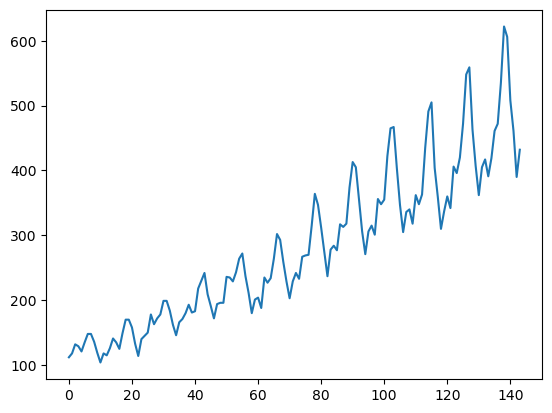

In [2]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, pacf_yw, pacf_burg, pacf_ols
# from statsmodels.tsa.tsatools import lagmat
import seaborn as sns
import matplotlib.pyplot as plt



flights = sns.load_dataset('flights')
month_map = {
    'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06',
    'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'
}
flights['month_str'] = flights['month'].map(month_map).astype(str)
flights['year_str'] = flights['year'].astype(str)
flights['date'] = flights['year_str'] + '-' + flights['month_str'] + '-01'
flights['date'] = pd.to_datetime(flights['date'])
flights = flights[['date', 'passengers']]
flights['passengers'].plot()


<Axes: >

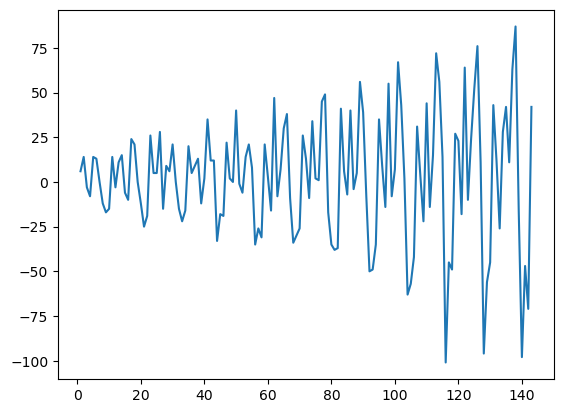

In [3]:
# First-order difference
flights['passengers_diff'] = flights['passengers'].diff(periods=1)
flights = flights.dropna()

flights['passengers_diff'].plot()

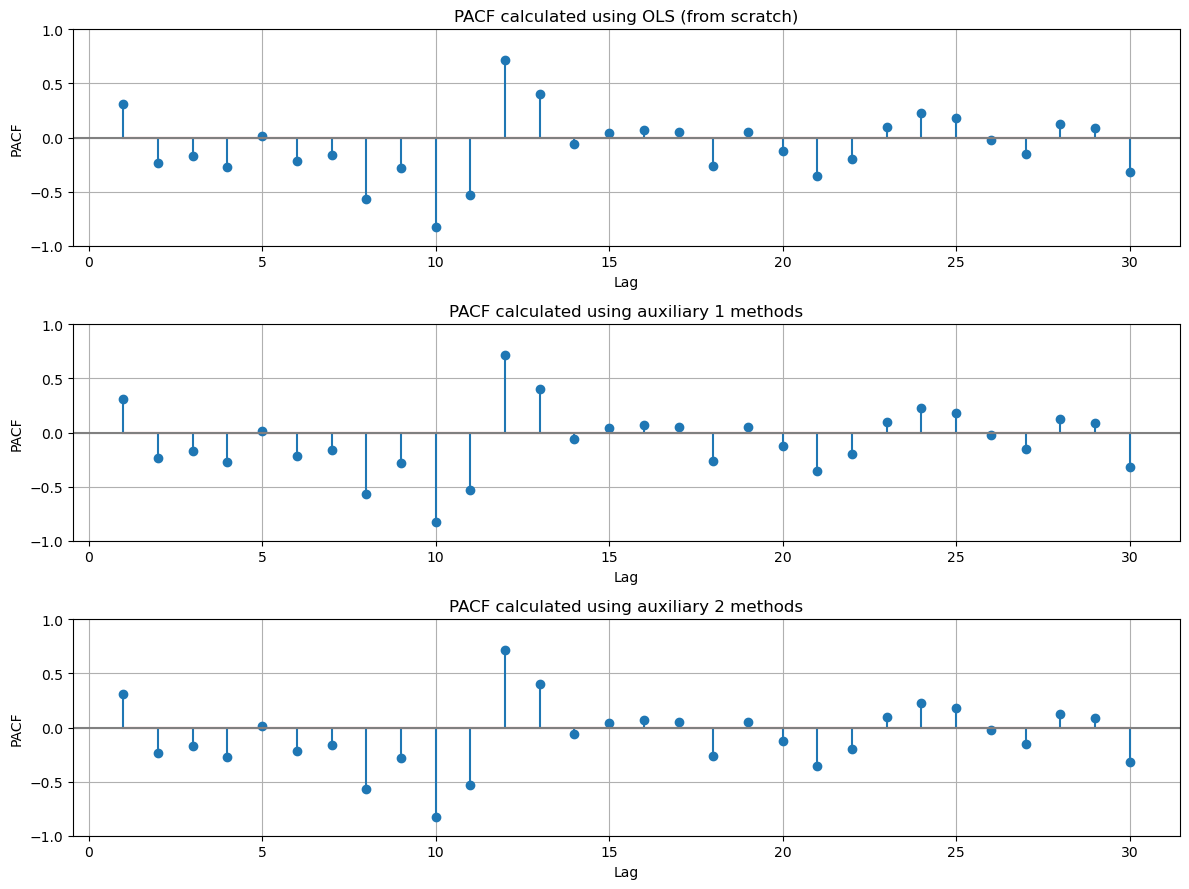

In [5]:

# Set the maximum lag for PACF calculation
max_lag = 30

# Calculate PACF using the OLS implementation
pacf_ols_from_scratch_values = pacf_ols_from_scratch(flights['passengers_diff'], max_lag)
pacf_reg_from_values = pacf_reg_from_scratch(flights['passengers_diff'], max_lag)
pacf_stats_values = calculate_pacf(flights['passengers_diff'], nlags=max_lag, method='ols')

data_list = [pacf_ols_from_scratch_values, pacf_reg_from_values, pacf_stats_values]
label_list = ['PACF calculated using OLS (from scratch)', 'PACF calculated using auxiliary 1 methods', 'PACF calculated using auxiliary 2 methods', 'PACF calculated using statsmodels (OLS)']

# Plot the results to compare
fig, axes = plt.subplots(nrows=len(data_list), figsize=(12, 3*len(data_list)))
for ax, data, label in zip(axes.flatten(), data_list, label_list):
    ax.stem(np.arange(1, len(data)), data[1:])
    ax.axhline(0, color='gray', linestyle='-')
    ax.set_title(label)
    ax.set_xlabel('Lag')
    ax.set_ylabel('PACF')
    ax.set_ylim(-1, 1)
    ax.grid(True)

plt.tight_layout()
plt.show()

# Conclusions / Summary

[ADAPT] In this post we have gained an understanding of partial autocorrelation. This is the correlation of a time series against a lagged version of itself exluding any intermediate lags. Its primary use is in estimating the number of auto-regressors components for forecasting models such as ARMA and ARIMA.

- [ADAPT] the partial autocorrelation describes a direct relationship, that is, it removes the effects of the intermediate lagged values,
- [ADAPT] there are multiple ways of calculating the partial autocorrelation coefficients, perhaps the simplest one is the one based on estimating autoregressive (AR) models using OLS.






[ADAPT] You can find the code used for this article on my GitHub. Also, any constructive feedback is welcome. You can reach out to me on Twitter or in the comments.

[ADAPT] The full code that used in this post is available at my GitHub here:



In summary, the primary usefulness of PACF lies in its ability to reveal the direct dependencies between observations at different lags, making it an indispensable tool for identifying the order of the autoregressive part of a time series model and guiding the model selection process, particularly within the ARIMA framework.


* **Partial Autocorrelation Function (PACF)** measures the **direct correlation** between $Y_t$ and $Y_{t-k}$ after *removing* the linear dependence of $Y_t$ on all lags between 1 and $k-1$.

Think of it this way: ACF tells you how much $Y_t$ is correlated with $Y_{t-k}$ in total. PACF tells you how much $Y_t$ is *directly* correlated with $Y_{t-k}$ once you account for the correlation that is already explained by the lags $Y_{t-1}, Y_{t-2}, \dots, Y_{t-k+1}$.


## References

- https://www.statsmodels.org/stable/index.html
- Hyndman, R.J., & Athanasopoulos, G. (2021) Forecasting: principles and practice, 3rd edition, OTexts: Melbourne, Australia. OTexts.com/fpp3. Accessed on 2022–01–28.
- https://www.statsmodels.org/stable/



- Box, G. E., Jenkins, G. M., Reinsel, G. C., & Ljung, G. M. (2015). Time series analysis: forecasting and control. John Wiley & Sons, p. 66

- https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.pacf_ols.html